In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [ ]:
transactions_customers = pd.merge(transactions, customers, on='CustomerID', how='left')
complete_data = pd.merge(transactions_customers, products, on='ProductID', how='left')


<ipython-input-5-8c31f504914b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.values, y=region_revenue.index, palette="viridis")


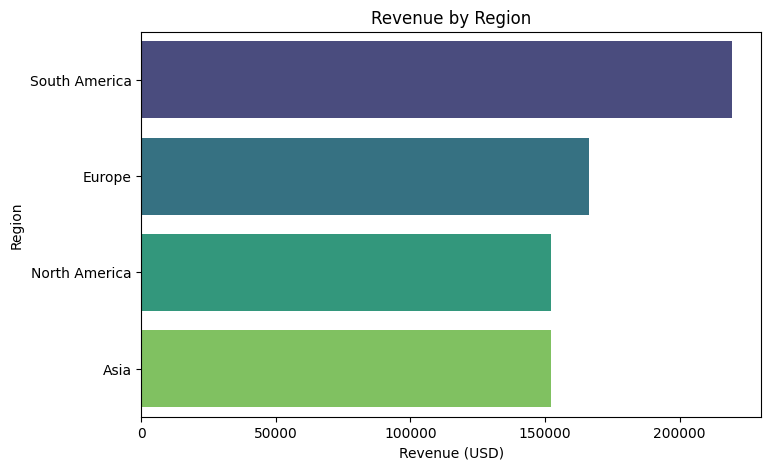

In [ ]:
region_revenue = complete_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=region_revenue.values, y=region_revenue.index, palette="viridis")
plt.title("Revenue by Region")
plt.xlabel("Revenue (USD)")
plt.ylabel("Region")
plt.show()


<ipython-input-6-7a0b3db05d22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")


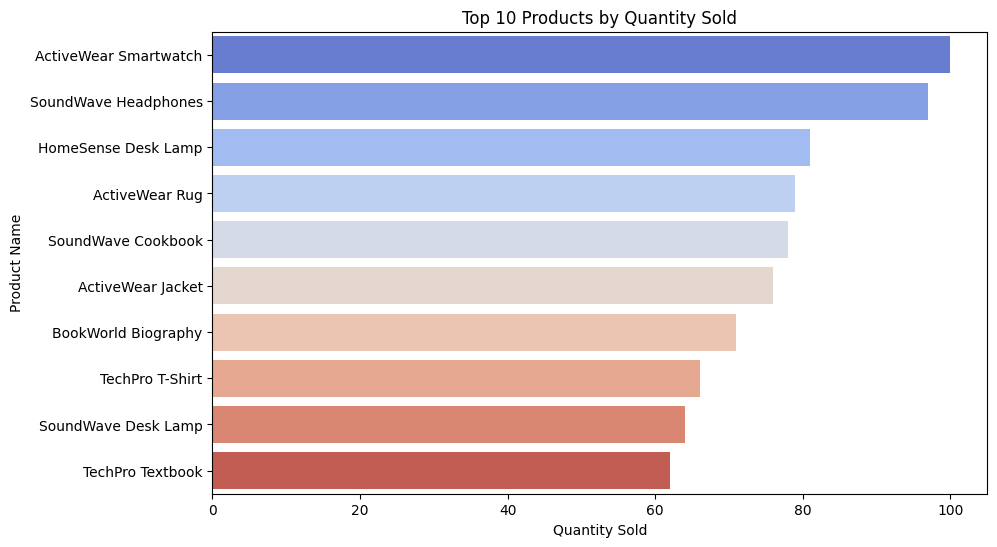

In [ ]:
top_products = complete_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()


<ipython-input-7-28539d26bc8a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="Blues")


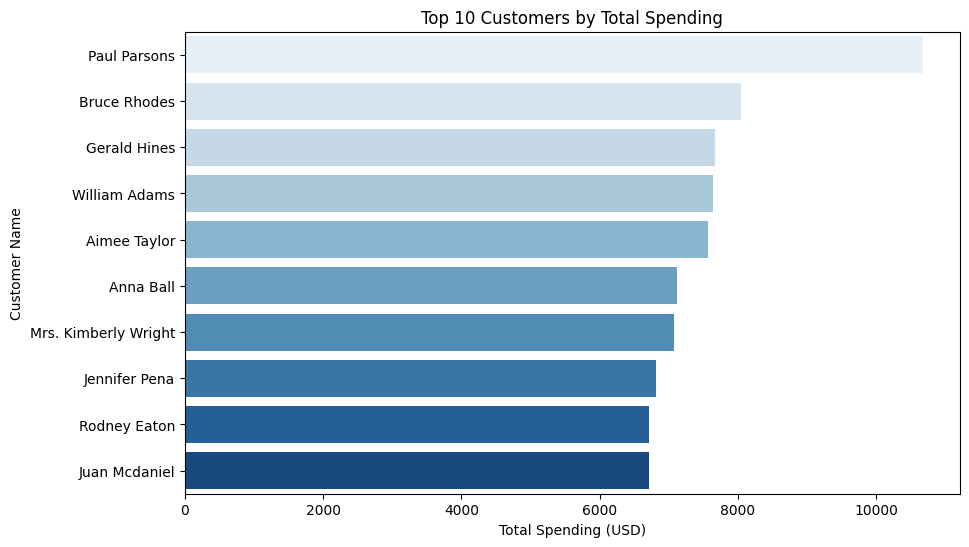

In [ ]:
top_customers = complete_data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="Blues")
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Customer Name")
plt.show()


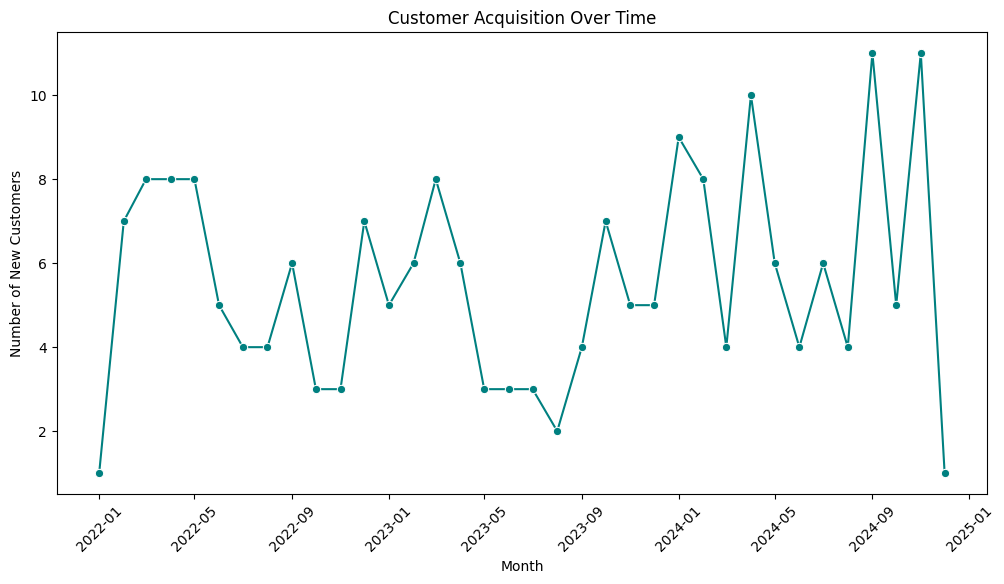

In [ ]:
customer_trend = customers.groupby(customers["SignupDate"].dt.to_period("M"))["CustomerID"].count()
customer_trend.index = customer_trend.index.to_timestamp()
plt.figure(figsize=(12, 6))
sns.lineplot(x=customer_trend.index, y=customer_trend.values, marker="o", color="teal")
plt.title("Customer Acquisition Over Time")
plt.xlabel("Month")
plt.ylabel("Number of New Customers")
plt.xticks(rotation=45)
plt.show()


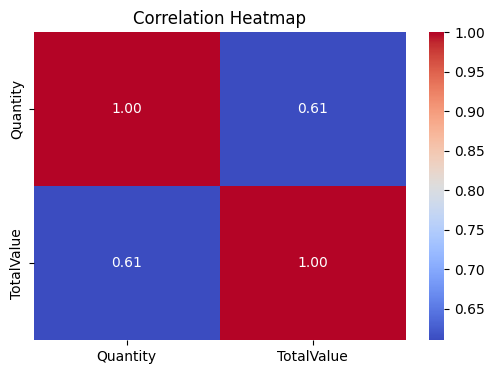

In [ ]:
correlation_data = complete_data[["Quantity", "TotalValue"]]
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#task 2 lookalike

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")


customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge datasets
transactions_customers = pd.merge(transactions, customers, on='CustomerID', how='left')
complete_data = pd.merge(transactions_customers, products, on='ProductID', how='left')


customer_features = (
    complete_data.groupby("CustomerID")
    .agg(
        total_spending=("TotalValue", "sum"),
        num_transactions=("TransactionID", "count"),
        avg_transaction_value=("TotalValue", "mean"),
    )
    .reset_index()
)


product_preferences = (
    complete_data.groupby(["CustomerID", "Category"])["Quantity"]
    .sum()
    .unstack(fill_value=0)
    .reset_index()
)

customer_data = pd.merge(customer_features, product_preferences, on="CustomerID", how="left")
customer_data = pd.merge(customer_data, customers[["CustomerID", "Region"]], on="CustomerID", how="left")


customer_data = pd.get_dummies(customer_data, columns=["Region"], drop_first=True)

scaler = StandardScaler()
feature_columns = [col for col in customer_data.columns if col not in ["CustomerID"]]
scaled_features = scaler.fit_transform(customer_data[feature_columns])
customer_data[feature_columns] = scaled_features

# Compute Similarities
similarity_matrix = cosine_similarity(customer_data[feature_columns])
similarity_df = pd.DataFrame(similarity_matrix, index=customer_data["CustomerID"], columns=customer_data["CustomerID"])

lookalike_results = {}

for customer_id in customer_data["CustomerID"]:
    similar_customers = (
        similarity_df[customer_id]
        .sort_values(ascending=False)
        .iloc[1:4]
        .reset_index()
    )
    similar_customers.columns = ["cust_id", "score"]
    lookalike_results[customer_id] = similar_customers.to_dict("records")

# Save Results to Lookalike.csv
lookalike_output = []

for cust_id, similar_list in lookalike_results.items():
    lookalike_output.append({"cust_id": cust_id, "similar_customers": similar_list})

lookalike_df = pd.DataFrame(lookalike_output)
lookalike_df.to_csv("Lookalike.csv", index=False)

recommendations_20 = lookalike_df[lookalike_df["cust_id"].isin([f"C{str(i).zfill(4)}" for i in range(1, 21)])]
print(recommendations_20)


   cust_id                                  similar_customers
0    C0001  [{'cust_id': 'C0120', 'score': 0.8560075913567...
1    C0002  [{'cust_id': 'C0178', 'score': 0.8981816126563...
2    C0003  [{'cust_id': 'C0031', 'score': 0.8652900814970...
3    C0004  [{'cust_id': 'C0012', 'score': 0.9310529501109...
4    C0005  [{'cust_id': 'C0007', 'score': 0.9201495226904...
5    C0006  [{'cust_id': 'C0187', 'score': 0.8652500812343...
6    C0007  [{'cust_id': 'C0005', 'score': 0.9201495226904...
7    C0008  [{'cust_id': 'C0109', 'score': 0.8329058602952...
8    C0009  [{'cust_id': 'C0198', 'score': 0.9706349815983...
9    C0010  [{'cust_id': 'C0111', 'score': 0.9037949324444...
10   C0011  [{'cust_id': 'C0107', 'score': 0.9065216391321...
11   C0012  [{'cust_id': 'C0004', 'score': 0.9310529501109...
12   C0013  [{'cust_id': 'C0099', 'score': 0.9375937585255...
13   C0014  [{'cust_id': 'C0060', 'score': 0.9799358106714...
14   C0015  [{'cust_id': 'C0058', 'score': 0.9362438180050...
15   C00